## Investigating track position on playlist

*Imports*

In [6]:
import pandas as pd
import seaborn as sns
import sqlite3
%matplotlib inline

In [7]:
conn = sqlite3.connect('../data_storage/spotify.db')

In [9]:
statement = '''
    SELECT playlist_track.track_uri, (playlist_track.pos*1.0/playlist.num_tracks) AS relative_position
    FROM playlist_track
    JOIN playlist ON playlist_track.pid=playlist.pid
    WHERE playlist.num_tracks > 10
    LIMIT 1000000
    '''
df = pd.read_sql_query(statement, conn)
df.head()

,track_uri,relative_position
0,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,0.000000
1,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,0.019231
2,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,0.038462
3,spotify:track:1AWQoqb9bSvzTjaLralEkT,0.057692
4,spotify:track:1lzr43nnXAijIGYnCT8M8H,0.076923


In [10]:
conn.close()

In [11]:
track_list = ['spotify:track:7KXjTSCq5nL1LoYtL7XAwS', 'spotify:track:1xznGGDReH1oQq0xzbwXa3',
              'spotify:track:7yyRTcZmCiyzzJlNzGC9Ol', 'spotify:track:7w9bgPAmPTtrkt2v16QWvQ']
curated_tracks = df.loc[df['track_uri'].isin(track_list)]

<Axes: xlabel='track_uri', ylabel='relative_position'>

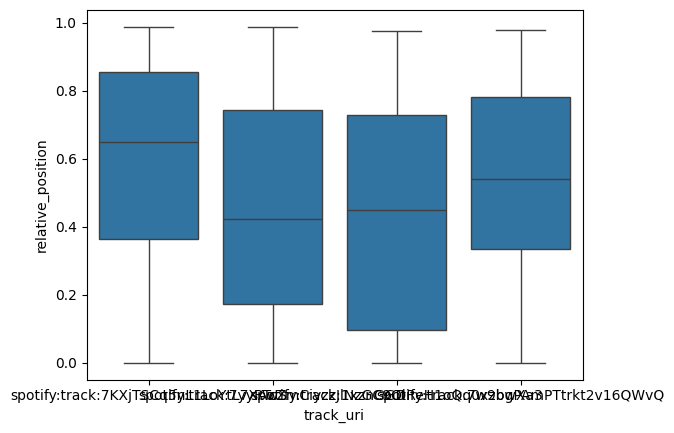

In [13]:
sns.boxplot(x='track_uri', y='relative_position', data=curated_tracks)